<h1><center><font size="6"> Kaggle: Personalized Medicine - Redefining Cancer Treatment</font></center></h1>

<h3><center><font size="4"> https://www.kaggle.com/c/msk-redefining-cancer-treatment </font></center></h2>

## Table of  Contents
1. [Initialization](#1)
    1. [Load packages](#11)
    1. [Define Metadata](#12)   
1. [Load Processed Data and Validate](#2)
1. [Data Insights](#3)
    1. [Data Structure](#31)
    1. [Summary Stats](#32)
    1. [Dataset shape](#32)
1. [Data Cleansing](#4)
    1. [Text Processing](#41)
    1. [Merge Two datasets](#42)
    1. [Handeling Missing Values](#43)
1. [Split Dataset](#5)
    1. [Feature - Target Split](#51)
    1. [Train - Test - Validation Split](#52)
    1. [Distribution of data in Train, Test and Validation set](#53)
1. [Feature Engineering](#6)
    1. [Handeling Categorical Features](#61)
    1. [Evaluating Transformed Features](#62)
    1. [Merging Important Features](#63)
1. [Modeling Workflow](#7)
    1. [Model 1: Compare Different Classifiers and Different Encoding Technique](#71)
    1. [Model 2: Hyperparameter Tuning](#72)
        1. [Logistic Regression using Hyperparameter Tuning](#721)
        1. [Random Forest using Hyperparameter Tuning](#722)
    1. [Model 3: Stacking Model](#73)
    1. [Model 4: Voting classifier](#74)
1. [Conclusion](#8)



## <a id='1'>1. Initialization</a>  

### <a id='11'>A. Load Packages</a>  

In [1]:
import os
import sys
# ------------------------------------------------------------------------------------------------------------------------------
# pandas is a Python library written for data manipulation and analysis. 
# In particular, it offers data structures and operations for manipulating numerical tables and time series.
import pandas as pd 
# NumPy is a Python library for adding support for large, multi-dimensional arrays and matrices, 
# along with a large collection of high-level mathematical functions to operate on these arrays. 
import numpy as np
# SciPy, which stands for Scientific Python, is a scientific computation library that uses NumPy underneath. It provides more 
# utility functions for optimization, stats and signal processing.
# Stack sparse matrices horizontally (column wise)
from scipy.sparse import hstack
# ------------------------------------------------------------------------------------------------------------------------------
# Visualization
# Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It  
# provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is a data visualization library built on top of matplotlib and closely integrated with pandas data structures.
import seaborn as sns

#  is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries 
# to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-
# dimensional data.
from sklearn.manifold import TSNE
# ------------------------------------------------------------------------------------------------------------------------------
# NLP
from nltk.corpus import stopwords
# CountVectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs
# in the entire text.
from sklearn.feature_extraction.text import CountVectorizer
# TfidfVectorizer converts a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer
# ------------------------------------------------------------------------------------------------------------------------------
# split into train and test set 
from sklearn.model_selection import train_test_split
# StratifiedKFold, which is a cross-validation object is a variation of KFold that returns stratified folds. The folds are made 
# by preserving the percentage of samples for each class.
from sklearn.model_selection import StratifiedKFold

# You can fit a model on a training dataset and calibrate this prefit model using a hold out validation dataset. Alternately, 
# the CalibratedClassifierCV can fit multiple copies of the model using k-fold cross-validation and calibrate the probabilities 
# predicted by these models using the hold out set.
from sklearn.calibration import CalibratedClassifierCV
# ------------------------------------------------------------------------------------------------------------------------------
# Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Also known as one-vs-all, this strategy consists in fitting one classifier per class. For each classifier, the class is fitted
# against all the other classes. In addition to its computational efficiency (only n_classes classifiers are needed), one 
# advantage of this approach is its interpretability. Since each class is represented by one and one classifier only, it is 
# possible to gain knowledge about the class by inspecting its corresponding classifier. This is the most commonly used strategy 
# for multiclass classification and is a fair default choice.
from sklearn.multiclass import OneVsRestClassifier

# An ensemble-learning meta-classifier for stacking.
from mlxtend.classifier import StackingClassifier

# Choosing estimators and their parameters
from sklearn import model_selection

#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
# ------------------------------------------------------------------------------------------------------------------------------
# Performance evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import precision_recall_curve, fbeta_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
# ------------------------------------------------------------------------------------------------------------------------------
# Resampling models
from imblearn.over_sampling import SMOTE
# ------------------------------------------------------------------------------------------------------------------------------
# Dimensionality Reduction
from sklearn.decomposition import TruncatedSVD
# ------------------------------------------------------------------------------------------------------------------------------
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
# ------------------------------------------------------------------------------------------------------------------------------
# Others!

# The math module is a standard module in Python, which gives access to the underlying C library functions.
import math

# Normalize samples individually to unit norm.
from sklearn.preprocessing import normalize

# The Python module re provides full support for Perl-like regular expressions in Python. The re module raises the exception re. 
# error if an error occurs while compiling or using a regular expression.
import re

# The time() function returns the number of seconds passed since epoch.
import time

# The shuffle() method takes a sequence, like a list, and reorganize the order of the items.
from sklearn.utils import shuffle

# Python Counter is a container that will hold the count of each of the elements present in the container. The counter is a 

# sub-class available inside the dictionary class.

# Defaultdict is a container like dictionaries present in the module collections. Defaultdict is a sub-class of the dict class 
#that returns a dictionary-like object. The functionality of both dictionaries and defualtdict are almost same except for the 
#fact that defualtdict never raises a KeyError. It provides a default value for the key that does not exists.
from collections import Counter, defaultdict
# ------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
# This is to suppress any deprecation warnings 

C:\Users\behnazfakharfirouzeh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# This code helps to print dfs side by side
# https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html

class display_df_(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

### <a id='12'>B. Define Metadata</a>  

In [3]:
# Define the name of the target class column here instead of manually typing it out everywhere
target_class_name = 'Class'

input_file_name1 = 'training_variants'
input_file_name2 = 'training_text'

data_path = 'C:/Behnaz/Udemy/training/'


## <a id='2'>2. Load Processed Data and Validate</a> 

In [4]:
df_v = pd.read_csv(data_path + input_file_name1)
# Loading training_text dataset. This is seperated by ||
df_t =pd.read_csv(data_path + input_file_name2,sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

In [5]:
display_df_('df_v.head(5)', 'df_t.head(5)')

df_v.head(5)
   ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

df_t.head(5)
   ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

In [6]:
display_df_('df_v.tail(5)', 'df_t.tail(5)')

df_v.tail(5)
        ID   Gene Variation  Class
3316  3316  RUNX1     D171N      4
3317  3317  RUNX1     A122*      1
3318  3318  RUNX1   Fusions      1
3319  3319  RUNX1      R80C      4
3320  3320  RUNX1      K83E      4

df_t.tail(5)
        ID                                               TEXT
3316  3316  Introduction  Myelodysplastic syndromes (MDS) ...
3317  3317  Introduction  Myelodysplastic syndromes (MDS) ...
3318  3318  The Runt-related transcription factor 1 gene (...
3319  3319  The RUNX1/AML1 gene is the most frequent targe...
3320  3320  The most frequent mutations associated with le...

#### $\rightarrow$ No trouble with loading the data, the head and tail.

## <a id=3 > 3. Data Insights

### <a id='31'>A. Data Structure</a> 

In [7]:
# Lets see the data structure
display(df_v.info())
# This will give you an indication of how many rows and columns are present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


None

In [8]:
# Lets see the data structure
df_t.info()
# This will give you an indication of how many rows and columns are present in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3321 non-null   int64 
 1   TEXT    3316 non-null   object
dtypes: int64(1), object(1)
memory usage: 52.0+ KB


### <a id='32'>B. Summary Stats</a> 

In [9]:
display_df_('df_v.describe()','df_t.describe()')

df_v.describe()
                ID        Class
count  3321.000000  3321.000000
mean   1660.000000     4.365854
std     958.834449     2.309781
min       0.000000     1.000000
25%     830.000000     2.000000
50%    1660.000000     4.000000
75%    2490.000000     7.000000
max    3320.000000     9.000000

df_t.describe()
                ID
count  3321.000000
mean   1660.000000
std     958.834449
min       0.000000
25%     830.000000
50%    1660.000000
75%    2490.000000
max    3320.000000

### <a id='34'>C. Dataset shape</a> 

In [10]:
print('Shape of variants dataset:', df_v.shape)
print('Shape of text dataset:', df_t.shape)

Shape of variants dataset: (3321, 4)
Shape of text dataset: (3321, 2)


## <a id=4 > 4. Data Cleansing

- Convert the data into a format that our ML method can understand it better. Such as
 - Unnessaury numbers
 - Stop words (e.g; “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at”, etc.) 
 - Extra spaces.

### <a id='41'>A.Text Processing</a> 

In [11]:
# To remove all English stop words like a, is, an, the, etc, we can use the following nltk library.
stop_words = set(stopwords.words('english'))

In [12]:
def data_text_preprocess(total_text, ind, col):
    # Removing insignificant int values from text data 
    if type(total_text) is not int:
        string = ""
        # Replacing all special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', str(total_text))
        # Replacing multiple spaces with single space
        total_text = re.sub('\s+',' ', str(total_text))
        # Converting all uppercase characters to lowercase. 
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from text.
            if not word in stop_words:
                string += word + " "
        
        df_t[col][ind] = string

In [13]:
# Below code will take some time because its huge text (took 4 minute on my 16 GB RAM system), so run it and have a cup of coffee :)
for index, row in df_t.iterrows():
    if type(row['TEXT']) is str:
        data_text_preprocess(row['TEXT'], index, 'TEXT')

In [14]:
# Ensure that all spaces in Gene and Variation column to be replaced by _.
df_v.Gene      = df_v.Gene.str.replace('\s+', '_')
df_v.Variation = df_v.Variation.str.replace('\s+', '_')

### <a id='42'>B. Merge Two datasets</a> 

In [15]:
#merging both gene_variations and text data based on ID
df = pd.merge(df_v, df_t,on='ID', how='left')
df.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [16]:
print('Shape of the dataset after concatination:', df.shape)

Shape of the dataset after concatination: (3321, 5)


### <a id='43'>C. Handeling Missing Values</a> 

In [17]:
df[df.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating_Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


Based on the above table, there are many rows with missing values. To handel missing value we can either drop rows having missing values or do some imputation in it. Here, we consider imputation since we have a small dataset. 

For imputation, we replace NaN with the concatination value of Gene and Variation column.

In [18]:
df.loc[df['TEXT'].isnull(),'TEXT'] = df['Gene'] +' '+ df['Variation']

In [19]:
# Check for mising value after imputation
df[df.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT


There is no missing value in the dataset.

## <a id=5 > 5. Split Dataset

### <a id='51'>A. Feature - Target Split </a> 

In [20]:
X = df.drop(target_class_name, axis=1)
y = df[target_class_name].values

### <a id='52'>B. Train - Test - Validation Split</a> 

In [21]:
# Split the data into 80% train and 20% test set. 
X1_train, X_test, y1_train, y_test = train_test_split(df, y, stratify=y, test_size=0.2,random_state=42)
# Split the train data now into 80% train and 20% validation set.
X_train, X_cv, y_train, y_cv = train_test_split(X1_train, y1_train, stratify=y1_train, test_size=0.2,random_state=42)

print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in validation data:', X_cv.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in validation data: 532


### <a id='53'>C. Distribution of data in Train, Test and Validation set.</a> 

In [22]:
# To make sure that we have proper class distribution in each set.
Distribution_df = pd.DataFrame(columns = ['train data','test data','validation data'],index = df['Class'].unique())

# X_train['Class'].value_counts().sort_index()
Distribution_df['train data'] = X_train['Class'].value_counts().sort_index()
Distribution_df['test data'] = X_test['Class'].value_counts().sort_index()
Distribution_df['validation data'] = X_cv['Class'].value_counts().sort_index()
Distribution_df

,train data,test data,validation data
1,363,114,91
2,289,91,72
3,57,18,14
4,439,137,110
5,155,48,39
6,176,55,44
7,609,191,153
8,12,4,3
9,24,7,6


To better observe the distribution of classes in different sets, we can show the class distribution in %.

In [23]:
# To make sure that we have proper class distribution in each set.
Distribution_per_df = pd.DataFrame(columns = ['train data %','test data %','validation data %'],index = df['Class'].unique())

# X_train['Class'].value_counts().sort_index()
Distribution_per_df['train data %'] = np.round((Distribution_df['train data'].values[:]/X_train.shape[0]*100), 3)
Distribution_per_df['test data %'] = np.round((Distribution_df['test data'].values[:]/X_test.shape[0]*100), 3)
Distribution_per_df['validation data %'] = np.round((Distribution_df['validation data'].values[:]/X_cv.shape[0]*100), 3)
Distribution_per_df

,train data %,test data %,validation data %
1,17.090,17.143,17.105
2,13.606,13.684,13.534
3,2.684,2.707,2.632
4,20.669,20.602,20.677
5,7.298,7.218,7.331
6,8.286,8.271,8.271
7,28.672,28.722,28.759
8,0.565,0.602,0.564
9,1.130,1.053,1.128


[Text(0, 0.5, 'Data points (%)'), Text(0.5, 0, 'Class')]

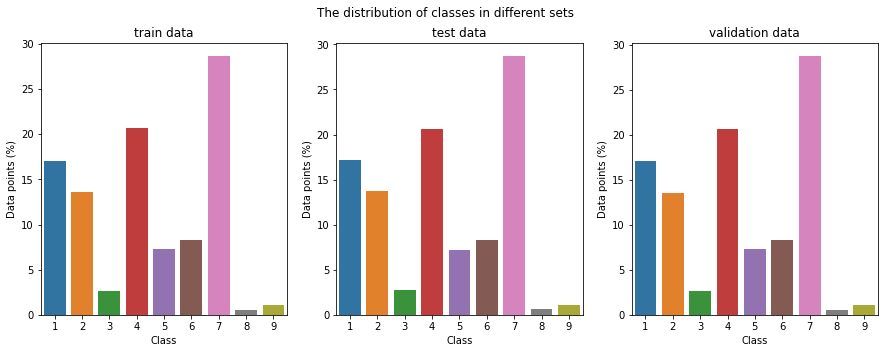

In [24]:
# Class distributions visualization
fig, axes = plt.subplots(1, 3, sharex = True, figsize = (15,5))
fig.suptitle('The distribution of classes in different sets')

# Train
sns.barplot(ax = axes[0], x = Distribution_per_df.index, y = Distribution_per_df['train data %'].values)
axes[0].set_title('train data')
axes[0].set(xlabel ='Class', ylabel='Data points (%)')

# Test
sns.barplot(ax = axes[1], x = Distribution_per_df.index, y = Distribution_per_df['test data %'].values)
axes[1].set_title('test data')
axes[1].set(xlabel ='Class', ylabel='Data points (%)')

# Validation
sns.barplot(ax = axes[2], x = Distribution_per_df.index, y = Distribution_per_df['validation data %'].values)
axes[2].set_title('validation data')
axes[2].set(xlabel = 'Class', ylabel = 'Data points (%)')


Based on above tables and figures, our train, test, and cv sets have almost the same class distributions.

## <a id=6 > 6. Feature Engineering

### <a id='61'>A. Handeling Categorical Features </a> 

In our dataset, we have three categorical variable. In this section, We are going to 

- Evaluate the impact of each feature.
- Transform the categorical values into numeric to enable our machine learning algorithm to understand features, accept them as input, and work with them.
- Evaluate each transformed feature.
- Concatenate important features

We can encode categorical features using different techniques. Here, we consider the following encoding methods:

- One-hot encoding
- Response Encoding


In [25]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurrence of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, train_df):
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df, train_df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, train_df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data 
    # then we will add the feature to gv_fea if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] 
    # to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

### Gene feature

In [26]:
# Check Number of Unique Genes
unique_genes = X_train['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most.predict_proba
print(unique_genes.head(10))

Number of Unique Genes : 236
BRCA1     154
TP53      104
EGFR       89
PTEN       88
BRCA2      83
KIT        63
BRAF       60
ALK        43
PDGFRA     41
ERBB2      41
Name: Gene, dtype: int64


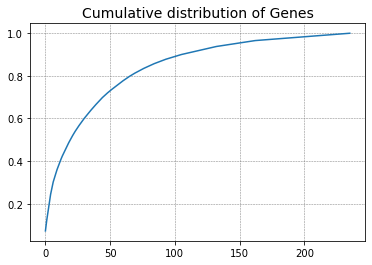

In [27]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
c = np.cumsum(h)
plt.plot(c)
plt.title("Cumulative distribution of Genes", fontsize = 14)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

The figure shows that the first 50 genes have almost 75% of occurrence. Therefore, gene is important for us and we need to transform it.

In [28]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
X_train_gene_onehotCoding = gene_vectorizer.fit_transform(X_train['Gene'])
X_test_gene_onehotCoding = gene_vectorizer.transform(X_test['Gene'])
X_cv_gene_onehotCoding = gene_vectorizer.transform(X_cv['Gene'])

X_train_gene_onehotCoding.shape

(2124, 236)

In [29]:
# response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1

X_train_gene_responseCoding = np.array(get_gv_feature(alpha, "Gene", X_train,X_train))
X_test_gene_responseCoding = np.array(get_gv_feature(alpha, "Gene", X_test, X_train))
X_cv_gene_responseCoding = np.array(get_gv_feature(alpha, "Gene", X_cv, X_train))

X_train_gene_responseCoding.shape

(2124, 9)

### Variation feature

Number of Unique Variatis : 1923


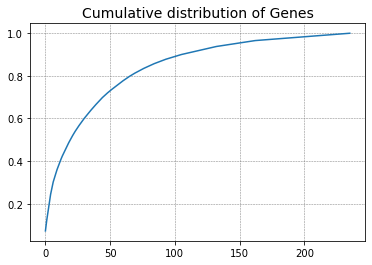

Truncating_Mutations    66
Amplification           47
Deletion                42
Fusions                 23
Overexpression           4
T58I                     3
G12V                     2
P34R                     2
R170W                    2
Q61H                     2
Name: Variation, dtype: int64


In [30]:
# Check Number of Unique Variations
unique_Variation = X_train['Variation'].value_counts()
print('Number of Unique Variatis :', unique_Variation.shape[0])
h = unique_genes.values/s;
c = np.cumsum(h)
plt.plot(c)
plt.title("Cumulative distribution of Genes", fontsize = 14)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

# The figure shows that the first 50 genes have almost 75% of occurrence. Therefor gene is important for us and we need to transform it.ons:', unique_Variation.shape[0])
# the top 10 genes that occured most
print(unique_Variation.head(10))

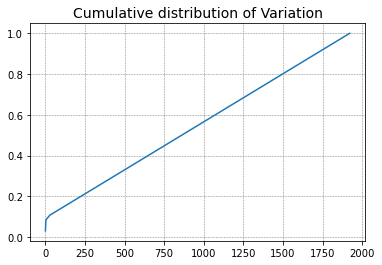

In [31]:
s = sum(unique_Variation.values);
h = unique_Variation.values/s;
c = np.cumsum(h)
plt.plot(c)
plt.title("Cumulative distribution of Variation", fontsize = 14)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

The figure shows that the 1500 variations have almost 80% of occurrence. Therefore, variations is important for us and we need to transform it.

In [32]:
# one-hot encoding of Variation feature.
variation_vectorizer = CountVectorizer()
X_train_variation_onehotCoding = variation_vectorizer.fit_transform(X_train['Variation'])
X_test_variation_onehotCoding = variation_vectorizer.transform(X_test['Variation'])
X_cv_variation_onehotCoding = variation_vectorizer.transform(X_cv['Variation'])

X_train_variation_onehotCoding.shape

(2124, 1952)

In [33]:
gene_vectorizer.fit_transform(X_train['Variation']).toarray()[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
# response-coding of the Variation feature
# alpha is used for laplace smoothing
alpha = 1
    
X_train_variation_responseCoding = np.array(get_gv_feature(alpha, "Variation", X_train,X_train))
X_test_variation_responseCoding = np.array(get_gv_feature(alpha, "Variation", X_test,X_train))
X_cv_variation_responseCoding = np.array(get_gv_feature(alpha, "Variation", X_cv,X_train))

X_train_variation_responseCoding.shape

(2124, 9)

### Text feature

In [35]:
# Total number of repeatition of each word in TEXT:

# for each row in df['TEXT']
# split words by space.
# make a dict with those words.
# increment the word's count whenever it occures.

def Count_number_of_each_word_in_TEXT(df):
    dictionary = defaultdict(int)
    for index, row in df.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [36]:
Count_number_of_each_word_in_TEXT(X_train)

defaultdict(int,
            {'etv6': 1800,
             'ntrk3': 569,
             'en': 830,
             'chimeric': 880,
             'tyrosine': 13607,
             'kinase': 42629,
             'generated': 5647,
             '12': 19265,
             '15': 17705,
             'translocations': 1387,
             'dominantly': 116,
             'acting': 609,
             'oncoprotein': 352,
             'diverse': 2029,
             'tumor': 44997,
             'types': 7110,
             'previously': 18276,
             'showed': 17464,
             'insulin': 1613,
             'like': 6826,
             'growth': 24516,
             'factor': 10399,
             '1': 138036,
             'receptor': 16441,
             'igf1r': 590,
             'essential': 3514,
             'mediated': 9055,
             'oncogenesis': 708,
             'substrate': 5820,
             'irs1': 187,
             'constitutively': 3006,
             'phosphorylated': 7369,
             'boun

In [37]:
# one-hot encoding of TEXT feature.

# building a CountVectorizer with all the words that occured minimum 3 times in train data.
text_vectorizer = CountVectorizer(min_df=3)
X_train_text_onehotCoding = text_vectorizer.fit_transform(X_train['TEXT'])
X_test_text_onehotCoding = text_vectorizer.transform(X_test['TEXT'])
X_cv_text_onehotCoding = text_vectorizer.transform(X_cv['TEXT'])

# Normalization
X_train_text_onehotCoding = normalize(X_train_text_onehotCoding, axis=0)
X_test_text_onehotCoding = normalize(X_test_text_onehotCoding, axis=0)
X_cv_text_onehotCoding = normalize(X_cv_text_onehotCoding, axis=0)

# Check Number of Unique words in TEXT feature
print("Total number of unique words in train data :", X_train_text_onehotCoding.shape[1])

Total number of unique words in train data : 53295


In [38]:
# Response encoding of TEXT feature. (https://stackoverflow.com/a/1602964)

def get_text_responsecoding(df, dict_list):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [39]:
# dict_list: contains 9 dictoinaries each contains number of occurrence of each word in a class
dict_list = []
for i in range(1,10):
    cls_text = X_train[X_train['Class']==i]
    dict_list.append(Count_number_of_each_word_in_TEXT(cls_text))

# dict_list[i] is build on i'th  class text data
# total number of occurrence of each word in training text data
total_dict = Count_number_of_each_word_in_TEXT(X_train)

In [40]:
X_train_text_responseCoding  = get_text_responsecoding(X_train, dict_list)
X_test_text_responseCoding  = get_text_responsecoding(X_test, dict_list)
X_cv_text_responseCoding  = get_text_responsecoding(X_cv, dict_list)

### <a id='62'>B. Evaluating Transformed Features </a> 

After converting each categorical feature into a format that our ML model can understand, we can investigate the importance of each feature.

In this Kaggle competition, log-loss evaluation metric is suggested to evaluate ML models. Therefore, we use this metric to investigate the imortance of each feature. (Refer to following URL for more details about log-loss:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)

log-loss value range is \[0, $\infty$) and the smaller the logg-loss value the better the model performance. Therefore, to specify log-loss value, whichis acceptable for us, we consider a random model. The log-loss is calculated for this random model and is considered as the worse log-loss value. Then, our goal is going to be designing a model, which provids lower log-loss value than that of our random model. In other words, the column with log-loss smaller than random model is considered as an important feature.

Note: Log-loss ia a complete concept on probability theory. Therfore, y_pred needs to be in terms of probability since we are using log-loss to evaluate our model. To handel this issue when y_pred is not probability, we use callibirated classifier.

### Random Model

In [41]:
# This functioin gives the predicted label using random Moldel:

# Initialize y_pred with the same number of rows as input and 9 columns.
# for each row:
# Construct an array of size 9 and sum of probability equal to one.
def log_loss_random_model(X_df,y_df, dataset = "dataset"):
    y_row_no = X_df.shape[0]
    y_pred = np.zeros((y_row_no,9))
    for i in range (y_row_no):
        y_pred[i] = ((np.random.rand(1,9)/sum(sum(np.random.rand(1,9))))[0])
        log_loss_metric = log_loss(y_df,y_pred, eps=1e-15)
    print("log-loss on " + dataset + " set using Random Model: {}".format(log_loss_metric))    
    return log_loss_metric,y_pred

In [42]:
# Fine log-loss value for test and cv sets using random model
cv_log_loss_metric_random_model, y_pred_cv = log_loss_random_model(X_cv, y_cv, dataset = "cv")
test_log_loss_metric_random_model, y_pred_test_p = log_loss_random_model(X_test, y_test, dataset = "test")

log-loss on cv set using Random Model: 2.362665779332182
log-loss on test set using Random Model: 2.4641943016502075


In [43]:
# y_pred_test_p

In [44]:
# # Let's get the index of max probablity
# y_pred_test =np.argmax(y_pred_test, axis=1) + 1 # one is added here to have y_pred in range 1-9
# y_pred_test

### One - Hot - encoding

In [45]:
def feature_evaluation_log_loss(clf, X_train, y_train, X_cv, y_cv, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred_cv_proba = clf.predict_proba(X_cv)
    y_pred_test_proba = clf.predict_proba(X_test)
    cv_log_loss = log_loss(y_cv,y_pred_cv_proba, eps=1e-15)
    test_log_loss= log_loss(y_test,y_pred_test_proba, eps=1e-15)
    return (cv_log_loss, test_log_loss)

In [46]:
clf = LogisticRegression()

Metrics_df = pd.DataFrame(
columns = ['Gene_cv','Gene_test','Variation_cv','Variation_test','Text_cv', 'Text_test'],
index = ['Response Encoding', 'One-Hot-Encoding'])
Metrics_df.loc['Response Encoding'][0:2] = feature_evaluation_log_loss(clf, X_train_gene_responseCoding, y_train, 
                                                X_cv_gene_responseCoding, y_cv, X_test_gene_responseCoding, y_test)
Metrics_df.loc['One-Hot-Encoding'][0:2] = feature_evaluation_log_loss(clf, X_train_gene_onehotCoding, y_train, 
                                                X_cv_gene_onehotCoding, y_cv, X_test_gene_onehotCoding, y_test)
Metrics_df.loc['Response Encoding'][2:4] = feature_evaluation_log_loss(clf, X_train_variation_responseCoding, y_train, 
                                                X_cv_variation_responseCoding, y_cv, X_test_variation_responseCoding, y_test)
Metrics_df.loc['One-Hot-Encoding'][2:4] = feature_evaluation_log_loss(clf, X_train_variation_onehotCoding, y_train, 
                                                X_cv_variation_onehotCoding, y_cv, X_test_variation_onehotCoding, y_test)
Metrics_df.loc['Response Encoding'][4:6] = feature_evaluation_log_loss(clf, X_train_text_responseCoding, y_train, 
                                                X_cv_text_responseCoding, y_cv, X_test_text_responseCoding, y_test)
Metrics_df.loc['One-Hot-Encoding'][4:6] = feature_evaluation_log_loss(clf, X_train_text_onehotCoding, y_train, 
                                                X_cv_text_onehotCoding, y_cv, X_test_text_onehotCoding, y_test)
Metrics_df


,Gene_cv,Gene_test,Variation_cv,Variation_test,Text_cv,Text_test
Response Encoding,1.37921,1.42842,1.74223,1.76845,1.44548,1.47657
One-Hot-Encoding,1.20091,1.26632,1.70393,1.72812,1.47769,1.63797


All features show smaller log_loss than Random model even without tuning the classifier.

### <a id='63'>C. Merging Important Features </a> 

In [47]:
# Merging converted gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

y_train = np.array(list(X_train['Class']))
y_cv = np.array(list(X_cv['Class']))
y_test = np.array(list(X_test['Class']))

# One-Hot_Encoding
train_gene_var_onehotCoding = hstack((X_train_gene_onehotCoding,X_train_variation_onehotCoding))
test_gene_var_onehotCoding = hstack((X_test_gene_onehotCoding,X_test_variation_onehotCoding))
cv_gene_var_onehotCoding = hstack((X_cv_gene_onehotCoding,X_cv_variation_onehotCoding))

X_train_onehotCoding = hstack((train_gene_var_onehotCoding, X_train_text_onehotCoding)).tocsr()
X_test_onehotCoding = hstack((test_gene_var_onehotCoding, X_test_text_onehotCoding)).tocsr()
X_cv_onehotCoding = hstack((cv_gene_var_onehotCoding, X_cv_text_onehotCoding)).tocsr()


# Response Encoding
train_gene_var_responseCoding = np.hstack((X_train_gene_responseCoding, X_train_variation_responseCoding))
test_gene_var_responseCoding = np.hstack((X_test_gene_responseCoding, X_test_variation_responseCoding))
cv_gene_var_responseCoding = np.hstack((X_cv_gene_responseCoding, X_cv_variation_responseCoding))

X_train_responseCoding = np.hstack((train_gene_var_responseCoding, X_train_text_responseCoding))
X_test_responseCoding = np.hstack((test_gene_var_responseCoding, X_test_text_responseCoding))
X_cv_responseCoding = np.hstack((cv_gene_var_responseCoding, X_cv_text_responseCoding))


# # gene & variation (One-Hot_Encoding) - text (Response Encoding) 
# train_gene_var_onehotCoding = hstack((X_train_gene_onehotCoding,X_train_variation_onehotCoding))
# test_gene_var_onehotCoding = hstack((X_test_gene_onehotCoding,X_test_variation_onehotCoding))
# cv_gene_var_onehotCoding = hstack((X_cv_gene_onehotCoding,X_cv_variation_onehotCoding))

# X_train_hot_res = hstack((train_gene_var_onehotCoding, X_train_text_responseCoding))
# X_test_hot_res = hstack((test_gene_var_onehotCoding, X_test_text_responseCoding))
# X_cv_hot_res = hstack((cv_gene_var_onehotCoding, X_cv_text_responseCoding))


In [48]:
print("One hot encoding features :")
print("(number of data points, number of features) in train data = ", X_train_onehotCoding.shape)
print("(number of data points, number of features) in test data = ", X_test_onehotCoding.shape)
print("(number of data points, number of features) in cross validation data =", X_cv_onehotCoding.shape)

One hot encoding features :
(number of data points, number of features) in train data =  (2124, 55483)
(number of data points, number of features) in test data =  (665, 55483)
(number of data points, number of features) in cross validation data = (532, 55483)


In [49]:
print(" Response encoding features :")
print("(number of data points, number of features) in train data = ", X_train_responseCoding.shape)
print("(number of data points, number of features) in test data = ", X_test_responseCoding.shape)
print("(number of data points, number of features) in cross validation data =", X_cv_responseCoding.shape)

 Response encoding features :
(number of data points, number of features) in train data =  (2124, 27)
(number of data points, number of features) in test data =  (665, 27)
(number of data points, number of features) in cross validation data = (532, 27)


In [50]:
# print(" Hot & Response features :")
# print("(number of data points, number of features) in train data = ", X_train_hot_res.shape)
# print("(number of data points, number of features) in test data = ", X_test_hot_res.shape)
# print("(number of data points, number of features) in cross validation data =", X_cv_hot_res.shape)

## <a id=7 > 7. Modeling Workflow

In this Section, different classifiers such as LR, NB, KNN, SVM, and RF are used to compare the result of different encoding tech. Then, we conclude which encoding technique and classifire leads to better result. 

### <a id='71'>A. Model 1: Compare Different Classifiers and Different Encoding Technique</a> 

In [51]:
def Model_evaluation(classifier, X_train, y_train, X_cv, y_cv, X_test, y_test):
    metrics_dict = {}
    
    classifier.fit(X_train, y_train)    
    sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
    sig_classifier.fit(X_train, y_train)
    
    y_pred_train_proba = sig_classifier.predict_proba(X_train)
    y_pred_cv_proba = sig_classifier.predict_proba(X_cv)
    y_pred_test_proba = sig_classifier.predict_proba(X_test)

#     y_pred_cv_proba = classifier.predict_proba(X_cv)
#     y_pred_test_proba = classifier.predict_proba(X_test)
    
    # log-loss
    metrics_dict['train_log_loss'] = log_loss(y_train,y_pred_train_proba, eps=1e-15)
    metrics_dict['cv_log_loss'] = log_loss(y_cv,y_pred_cv_proba, eps=1e-15)
    metrics_dict['test_log_loss'] = log_loss(y_test,y_pred_test_proba, eps=1e-15)
    
    # Accuracy
    metrics_dict['train_Acc (%)'] = round(sig_classifier.score(X_train, y_train),2) * 100 
    metrics_dict['cv_Acc (%)'] = round(sig_classifier.score(X_cv, y_cv),2) * 100 
    metrics_dict['test_Acc (%)'] = round(sig_classifier.score(X_test, y_test),2) * 100

    return metrics_dict

##### Logistic Regression

In [52]:
# Initialize a classifier object with default params
LR_clf = LogisticRegression()
# Use Model_evaluation function to evaluate the model
LR_responseCoding_result = Model_evaluation(LR_clf, X_train_responseCoding, y_train, X_cv_responseCoding, y_cv, X_test_responseCoding, y_test)
LR_onehotCoding_result = Model_evaluation(LR_clf, X_train_onehotCoding, y_train, X_cv_onehotCoding, y_cv, X_test_onehotCoding, y_test)

LR_metrics_df = pd.DataFrame(
columns = ['train_log_loss','cv_log_loss','test_log_loss','cv_Acc (%)','test_Acc (%)'],
index = ['Response Encoding', 'One-Hot-Encoding'])
LR_metrics_df.loc['Response Encoding'] = LR_responseCoding_result
LR_metrics_df.loc['One-Hot-Encoding'] = LR_onehotCoding_result
print("Compare Response Encoding and One-Hot-Encoding using LR:")
LR_metrics_df

Compare Response Encoding and One-Hot-Encoding using LR:


,train_log_loss,cv_log_loss,test_log_loss,cv_Acc (%),test_Acc (%)
Response Encoding,1.07905,1.17073,1.25189,57,57
One-Hot-Encoding,0.531786,1.01216,1.13506,66,62


##### Naive Bayes

In [53]:
# Initialize a classifier object with default params
NB_clf = GaussianNB()
# Use Model_evaluation function to evaluate the model
NB_responseCoding_result = Model_evaluation(NB_clf, X_train_responseCoding, y_train, X_cv_responseCoding, y_cv,
                                            X_test_responseCoding, y_test)
NB_onehotCoding_result = Model_evaluation(NB_clf, X_train_onehotCoding.toarray(), y_train, X_cv_onehotCoding.toarray(), y_cv, 
                                          X_test_onehotCoding.toarray(), y_test)

NB_metrics_df = pd.DataFrame(
columns = ['train_log_loss','cv_log_loss','test_log_loss','cv_Acc (%)','test_Acc (%)'],
index = ['Response Encoding', 'One-Hot-Encoding'])
NB_metrics_df.loc['Response Encoding'] = NB_responseCoding_result
NB_metrics_df.loc['One-Hot-Encoding'] = NB_onehotCoding_result

print("Compare Response Encoding and One-Hot-Encoding using NB:")
NB_metrics_df


Compare Response Encoding and One-Hot-Encoding using NB:


,train_log_loss,cv_log_loss,test_log_loss,cv_Acc (%),test_Acc (%)
Response Encoding,0.666964,1.93124,2.00406,46,45
One-Hot-Encoding,0.761873,1.40219,1.45601,55,52


##### K-Nearest Neighbour

In [54]:
# Initialize a classifier object with default params
KNN_clf = KNeighborsClassifier()
# Use Model_evaluation function to evaluate the model
KNN_responseCoding_result = Model_evaluation(KNN_clf, X_train_responseCoding, y_train, X_cv_responseCoding, y_cv,
                                            X_test_responseCoding, y_test)
KNN_onehotCoding_result = Model_evaluation(KNN_clf, X_train_onehotCoding.toarray(), y_train, X_cv_onehotCoding.toarray(), y_cv, 
                                          X_test_onehotCoding.toarray(), y_test)

KNN_metrics_df = pd.DataFrame(
columns = ['train_log_loss','cv_log_loss','test_log_loss','cv_Acc (%)','test_Acc (%)'],
index = ['Response Encoding', 'One-Hot-Encoding'])
KNN_metrics_df.loc['Response Encoding'] = KNN_responseCoding_result
KNN_metrics_df.loc['One-Hot-Encoding'] = KNN_onehotCoding_result

print("Compare Response Encoding and One-Hot-Encoding using KNN:")
KNN_metrics_df


Compare Response Encoding and One-Hot-Encoding using KNN:


,train_log_loss,cv_log_loss,test_log_loss,cv_Acc (%),test_Acc (%)
Response Encoding,0.433242,1.05383,1.21585,66,59
One-Hot-Encoding,0.930286,1.21185,1.33733,59,53


##### Support Vector Machine (SVM)

In [55]:
# Initialize a classifier object with default params
SVM_clf = SVC()
# Use Model_evaluation function to evaluate the model
SVM_responseCoding_result = Model_evaluation(SVM_clf, X_train_responseCoding, y_train, X_cv_responseCoding, y_cv,
                                            X_test_responseCoding, y_test)
SVM_onehotCoding_result = Model_evaluation(SVM_clf, X_train_onehotCoding.toarray(), y_train, X_cv_onehotCoding.toarray(), y_cv, 
                                          X_test_onehotCoding.toarray(), y_test)

SVM_metrics_df = pd.DataFrame(
columns = ['train_log_loss','cv_log_loss','test_log_loss','cv_Acc (%)','test_Acc (%)'],
index = ['Response Encoding', 'One-Hot-Encoding'])
SVM_metrics_df.loc['Response Encoding'] = SVM_responseCoding_result
SVM_metrics_df.loc['One-Hot-Encoding'] = SVM_onehotCoding_result

print("Compare Response Encoding and One-Hot-Encoding using SVM:")
SVM_metrics_df

Compare Response Encoding and One-Hot-Encoding using SVM:


,train_log_loss,cv_log_loss,test_log_loss,cv_Acc (%),test_Acc (%)
Response Encoding,0.886483,1.18646,1.28481,62,58
One-Hot-Encoding,0.725338,1.45769,1.47813,53,53


##### Random Forest (RF)

In [56]:
# Initialize a classifier object with default params
RF_clf = RandomForestClassifier()
# Use Model_evaluation function to evaluate the model
RF_responseCoding_result = Model_evaluation(RF_clf, X_train_responseCoding, y_train, X_cv_responseCoding, y_cv,
                                            X_test_responseCoding, y_test)
RF_onehotCoding_result = Model_evaluation(RF_clf, X_train_onehotCoding.toarray(), y_train, X_cv_onehotCoding.toarray(), y_cv, 
                                          X_test_onehotCoding.toarray(), y_test)

RF_metrics_df = pd.DataFrame(
columns = ['train_log_loss','cv_log_loss','test_log_loss','cv_Acc (%)','test_Acc (%)'],
index = ['Response Encoding', 'One-Hot-Encoding'])
RF_metrics_df.loc['Response Encoding'] = RF_responseCoding_result
RF_metrics_df.loc['One-Hot-Encoding'] = RF_onehotCoding_result

print("Compare Response Encoding and One-Hot-Encoding using RF:")
RF_metrics_df

Compare Response Encoding and One-Hot-Encoding using RF:


,train_log_loss,cv_log_loss,test_log_loss,cv_Acc (%),test_Acc (%)
Response Encoding,0.0364591,1.7945,1.83311,29,29
One-Hot-Encoding,0.374148,1.17851,1.2541,59,58


Based on the results, LR and RF classifiers using One-Hot-Encoding technique provide the first  and the second best results, respectively. For the rest of our experiments, we use LR, RF, and One-Hot-Encoding technique.

### <a id='72'>B. Model 2: Hyperparameter Tuning</a> 

### <a id='721'>a. Logistic Regression using Hyperparameter Tuning</a> 

In [57]:
# Initialize a classifier object with default params
# LR_onehotCoding_result = Model_evaluation(LR_clf, X_train_onehotCoding, y_train, X_cv_onehotCoding, y_cv, X_test_onehotCoding, y_test)

alpha = [10 ** x for x in range(-6, 3)]
cv_log_loss_array = []
for i in alpha:
    classifier = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    classifier.fit(X_train_onehotCoding, y_train)    
    sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
    sig_classifier.fit(X_train_onehotCoding, y_train)
    
    y_pred_cv_proba = sig_classifier.predict_proba(X_cv_onehotCoding)
    
    cv_log_loss_array.append(log_loss(y_cv,y_pred_cv_proba))
    print("Log Loss for alpha =", i, "is: ",(log_loss(y_cv,y_pred_cv_proba, eps=1e-15)))
   


Log Loss for alpha = 1e-06 is:  1.3116609680690392
Log Loss for alpha = 1e-05 is:  1.2766644613377498
Log Loss for alpha = 0.0001 is:  1.1134633800277676
Log Loss for alpha = 0.001 is:  1.0800139337017636
Log Loss for alpha = 0.01 is:  1.1440416225610062
Log Loss for alpha = 0.1 is:  1.3540064124351994
Log Loss for alpha = 1 is:  1.583683573338141
Log Loss for alpha = 10 is:  1.6210306919877266
Log Loss for alpha = 100 is:  1.625306916265727


In [58]:
# The alpha that give the minimum value of log-loss
best_alpha = np.argmin(cv_log_loss_array)

print('For LR, the best value of alpha =', alpha[best_alpha],', provides log-loss value of', cv_log_loss_array[best_alpha])

For LR, the best value of alpha = 0.001 , provides log-loss value of 1.0800139337017636


In [59]:
# Use the best value of alpha to train the classifier
classifier = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
classifier.fit(X_train_onehotCoding, y_train)    
sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
sig_classifier.fit(X_train_onehotCoding, y_train)

log_loss_LR_train = log_loss(y_train, sig_classifier.predict_proba(X_train_onehotCoding))
log_loss_LR_cv = log_loss(y_cv, sig_classifier.predict_proba(X_cv_onehotCoding))                                           
log_loss_LR_test = log_loss(y_test, sig_classifier.predict_proba(X_test_onehotCoding))

print("By using Tuned LR classifier we have:")
print("The train log-loss is:",log_loss_LR_train)
print("The cross validation log-loss is:",log_loss_LR_cv)
print("The test log-loss is:",log_loss_LR_test)

By using Tuned LR classifier we have:
The train log-loss is: 0.505912541080467
The cross validation log-loss is: 1.0800139337017636
The test log-loss is: 1.2494786119544001


### <a id='722'>b. Random Forest using Hyperparameter Tuning</a> 

In [60]:
# Initialize a classifier object with default params
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_loss_array = []
for i in alpha:
    for j in max_depth:
        classifier = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        classifier.fit(X_train_onehotCoding, y_train)    
        sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
        sig_classifier.fit(X_train_onehotCoding, y_train)

        y_pred_cv_proba = sig_classifier.predict_proba(X_cv_onehotCoding)

        cv_log_loss_array.append(log_loss(y_cv,y_pred_cv_proba))
        print("Log Loss for alpha =", i, "and max depth =", j, "is: ",(log_loss(y_cv,y_pred_cv_proba, eps=1e-15)))

Log Loss for alpha = 100 and max depth = 5 is:  1.2157149722499943
Log Loss for alpha = 100 and max depth = 10 is:  1.1443183162870751
Log Loss for alpha = 200 and max depth = 5 is:  1.2063788319833724
Log Loss for alpha = 200 and max depth = 10 is:  1.1336617283524495
Log Loss for alpha = 500 and max depth = 5 is:  1.2014400753611916
Log Loss for alpha = 500 and max depth = 10 is:  1.1335467872348575
Log Loss for alpha = 1000 and max depth = 5 is:  1.201793822531273
Log Loss for alpha = 1000 and max depth = 10 is:  1.13665359767696
Log Loss for alpha = 2000 and max depth = 5 is:  1.203703234772255
Log Loss for alpha = 2000 and max depth = 10 is:  1.1373173405500907


In [61]:
# The alpha that give the minimum value of log-loss
best_alpha = np.argmin(cv_log_loss_array)

print('For RF, the best value of alpha = ', alpha[int(best_alpha/2)], 'and max depth =', 
      max_depth[int(best_alpha%2)],', provides log-loss value of', cv_log_loss_array[best_alpha])

For RF, the best value of alpha =  500 and max depth = 10 , provides log-loss value of 1.1335467872348575


In [62]:
classifier = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', 
                                    max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
classifier.fit(X_train_onehotCoding, y_train)    
sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
sig_classifier.fit(X_train_onehotCoding, y_train)

log_loss_RF_train = log_loss(y_train, sig_classifier.predict_proba(X_train_onehotCoding))
log_loss_RF_cv = log_loss(y_cv, sig_classifier.predict_proba(X_cv_onehotCoding))                                           
log_loss_RF_test = log_loss(y_test, sig_classifier.predict_proba(X_test_onehotCoding))

print("By using Tuned RF classifier we have:")
print("The train log-loss is:",log_loss_RF_train)
print("The cross validation log-loss is:",log_loss_RF_cv)
print("The test log-loss is:",log_loss_RF_test)



By using Tuned RF classifier we have:
The train log-loss is: 0.6757988808182556
The cross validation log-loss is: 1.1335467872348575
The test log-loss is: 1.2251900663727597


### <a id='73'>C. Model 3: Stacking Model</a> 

In [63]:
# Logistic Regression
classifierLR = SGDClassifier(alpha=0.001, penalty='l2', loss='log', random_state=42)
classifierLR.fit(X_train_onehotCoding, y_train) 
sig_classifierLR = CalibratedClassifierCV(classifierLR, method="sigmoid")
sig_classifierLR.fit(X_train_onehotCoding, y_train)
y_LRpred_cv_proba = sig_classifierLR.predict_proba(X_cv_onehotCoding)

# Random Forest
classifierRF = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
classifierRF.fit(X_train_onehotCoding, y_train)    
sig_classifierRF = CalibratedClassifierCV(classifierRF, method="sigmoid")
sig_classifierRF.fit(X_train_onehotCoding, y_train)
y_RFpred_cv_proba = sig_classifierRF.predict_proba(X_cv_onehotCoding)

print("Logistic Regression:  Log Loss: %0.2f =" % (log_loss(y_cv, y_LRpred_cv_proba)))
print("Random Forest: Log Loss: %0.2f = " % (log_loss(y_cv, y_RFpred_cv_proba)))
print("-"*100)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
cv_log_loss_array = []
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    StackingClassifer = StackingClassifier(classifiers=[sig_classifierLR, sig_classifierRF], 
                                           meta_classifier=lr, use_probas=True)
    StackingClassifer.fit(X_train_onehotCoding, y_train)
    log_loss_StackingClassifer = log_loss(y_cv, StackingClassifer.predict_proba(X_cv_onehotCoding))
    print("Stacking Classifer: for the value of alpha = %f Log Loss: %0.3f is" % (i, log_loss_StackingClassifer))
    cv_log_loss_array.append(log_loss_StackingClassifer)
    

Logistic Regression:  Log Loss: 1.08 =
Random Forest: Log Loss: 1.13 = 
----------------------------------------------------------------------------------------------------
Stacking Classifer: for the value of alpha = 0.000100 Log Loss: 1.816 is
Stacking Classifer: for the value of alpha = 0.001000 Log Loss: 1.707 is
Stacking Classifer: for the value of alpha = 0.010000 Log Loss: 1.308 is
Stacking Classifer: for the value of alpha = 0.100000 Log Loss: 1.122 is
Stacking Classifer: for the value of alpha = 1.000000 Log Loss: 1.356 is
Stacking Classifer: for the value of alpha = 10.000000 Log Loss: 1.734 is


In [64]:
# The alpha that give the minimum value of log-loss
best_alpha = np.argmin(cv_log_loss_array)

print('For Stacking Classifer, the best value of alpha is', alpha[best_alpha])

For Stacking Classifer, the best value of alpha is 0.1


In [65]:
lr = LogisticRegression(C = alpha[best_alpha])
Classifer = StackingClassifier(classifiers=[sig_classifierLR, sig_classifierRF], meta_classifier=lr, use_probas=True)
classifier.fit(X_train_onehotCoding, y_train)    

log_loss_StackingClassifer_train = log_loss(y_train, classifier.predict_proba(X_train_onehotCoding))
log_loss_StackingClassifer_cv = log_loss(y_cv, classifier.predict_proba(X_cv_onehotCoding))                                           
log_loss_StackingClassifer_test = log_loss(y_test, classifier.predict_proba(X_test_onehotCoding))

print("By using Stacking Classifer we have:")
print("The train log-loss is:",log_loss_StackingClassifer_train)#log_loss(y_train, y_pred_train_proba, labels=classifier.classes_, eps=1e-15))
print("The cross validation log-loss is:",log_loss_StackingClassifer_cv)#log_loss(y_cv, y_pred_cv_proba, labels=classifier.classes_, eps=1e-15))
print("The test log-loss is:",log_loss_StackingClassifer_test)#log_loss(y_test, y_pred_test_proba, labels=classifier.classes_, eps=1e-15))

By using Stacking Classifer we have:
The train log-loss is: 0.9129089410128405
The cross validation log-loss is: 1.279622378823506
The test log-loss is: 1.3572488220174919


### <a id='74'>D. Model 4: Voting Classifier</a> 

In [66]:
vclassifier = VotingClassifier(estimators=[('lr', sig_classifierLR), ('RF', sig_classifierRF)], voting='soft')
vclassifier.fit(X_train_onehotCoding, y_train) 
                      
log_loss_vclassifier_train = log_loss(y_train, vclassifier.predict_proba(X_train_onehotCoding))
log_loss_vclassifier_cv = log_loss(y_cv, vclassifier.predict_proba(X_cv_onehotCoding))                                           
log_loss_vclassifier_test = log_loss(y_test, vclassifier.predict_proba(X_test_onehotCoding))

print("By using Voting Classifer we have:")
print("The train log-loss is:", log_loss_vclassifier_train)
print("The cross validation log-loss is:", log_loss_vclassifier_cv)
print("The test log-loss is:", log_loss_vclassifier_test)

By using Voting Classifer we have:
The train log-loss is: 0.5706206852330493
The cross validation log-loss is: 1.0046195701950729
The test log-loss is: 1.1301653120307023


## <a id = 8 > 8. Conclusion

In [67]:
metrics_df_conc = pd.DataFrame(
columns = ['Model 1','Model 2 (LR)','Model 2 (RF)', 'Model 3','Model 4'],
index = ['log-loss (Test set)'])
metrics_df_conc['Model 1'] = LR_onehotCoding_result['test_log_loss']
metrics_df_conc['Model 2 (LR)'] = log_loss_LR_test
metrics_df_conc['Model 2 (RF)'] = log_loss_RF_test
metrics_df_conc['Model 3'] = log_loss_StackingClassifer_test
metrics_df_conc['Model 4'] = log_loss_vclassifier_test
metrics_df_conc

,Model 1,Model 2 (LR),Model 2 (RF),Model 3,Model 4
log-loss (Test set),1.135065,1.249479,1.22519,1.357249,1.130165


###### In summary, the results show that the Model 4  provides the best log-loss compared to other models. 

In [68]:
# confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
# ModelSpe = 'Random Model'

# g = plt.figure(figsize=(15,5))
# labels = [1,2,3,4,5,6,7,8,9]
# ax = sns.heatmap(confusion_matrix_test,cmap="YlGnBu", annot=True, annot_kws={"size": 16},xticklabels=labels, yticklabels=labels) # font size
# plt.title('Confusion Matrix - '+ ModelSpe, fontsize = 20) # title with fontsize 20
# plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
# plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')
# g.show()
